# Upload the dataset

In [ ]:
# =========================
# Cell 1: Load Excel dataset
# =========================

import pandas as pd

# In Colab: this lets you upload the Excel from your computer
from google.colab import files

uploaded = files.upload()   # upload FinalData_Rev03.xlsx

# Take the first uploaded file name
file_name = list(uploaded.keys())[0]
print("Loaded file:", file_name)

# Read Excel into a DataFrame
df = pd.read_excel(file_name)

print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())


Saving FinalData_Rev03.xlsx to FinalData_Rev03.xlsx
Loaded file: FinalData_Rev03.xlsx
Data shape: (4426, 11)
Columns: ['Fluegas CO2 mol%', 'Fluegas Flow (kg/h)', 'Lean Solvent Flow (kg/h)', 'Lean Solvent Loading', 'Amine type', 'Amine Conc (wt%)', 'Lean Solvent T (C)', 'Reboiler Duty (MW)', 'Recovery%', 'SEC (kJ/kg)', 'CO2 Purity (mol%)']


,Fluegas CO2 mol%,Fluegas Flow (kg/h),Lean Solvent Flow (kg/h),Lean Solvent Loading,Amine type,Amine Conc (wt%),Lean Solvent T (C),Reboiler Duty (MW),Recovery%,SEC (kJ/kg),CO2 Purity (mol%)
0,2.0,1500000,799999.978656,0.549078,MEA,14.992197,37,334.722,79.245274,56719.0360,15.717487
1,2.5,1500000,800000.056029,0.684311,MEA,14.992198,37,334.722,65.364609,55194.9810,16.260676
2,3.0,1500000,800000.046691,0.818743,MEA,14.992230,37,334.722,55.797255,54052.4141,16.691000
3,3.5,1500000,800000.030682,0.952395,MEA,14.992265,37,334.722,48.786473,53151.3501,17.046290
4,4.0,1500000,800000.038687,1.085248,MEA,14.992301,37,334.722,43.422744,52411.0539,17.349306


# Preprocessing

In [ ]:
# ================================================
# Cell 2 (UPDATED): Encode, shuffle, normalize
# ================================================

import numpy as np
from sklearn.preprocessing import StandardScaler

# Define mapping exactly as requested
amine_mapping = {
    "MEA": 1,
    "DGA": 2,
    "DEA": 3,
    "TEA": 4,
    "MDEA": 5
}

# Create a new encoded column (keep original as reference)
df["Amine_type_code"] = df["Amine type"].map(amine_mapping)

# Sanity check: unique values before / after
print("Original amine types:", df["Amine type"].unique())
print("Encoded amine codes (before shuffle):", sorted(df["Amine_type_code"].unique()))

# 🔀 Shuffle the entire DataFrame after encoding
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("\nData shuffled.")
print("Data shape after shuffle:", df.shape)

# -----------------------------
# Normalization (StandardScaler)
# -----------------------------

# Columns used for loading and ANN models (raw names)
load_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Amine Conc (wt%)",
    "Amine_type_code"
]

ann_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Lean Solvent Loading",
    "Amine_type_code",
    "Amine Conc (wt%)",
    "Lean Solvent T (C)",
    "Reboiler Duty (MW)"
]

# Fit scalers on FULL dataset (raw values)
scaler_load = StandardScaler()
scaler_ann = StandardScaler()

scaler_load.fit(df[load_feature_cols])
scaler_ann.fit(df[ann_feature_cols])

# Create normalized columns with suffix "_norm"
load_norm = scaler_load.transform(df[load_feature_cols])
ann_norm = scaler_ann.transform(df[ann_feature_cols])

for i, col in enumerate(load_feature_cols):
    df[col + "_norm"] = load_norm[:, i]

for i, col in enumerate(ann_feature_cols):
    df[col + "_norm"] = ann_norm[:, i]

print("\nNormalization completed.")
print("Created StandardScaler objects: 'scaler_load', 'scaler_ann'.")
print("Added normalized columns with suffix '_norm'.")
display(df.head())


Original amine types: ['MEA' 'DEA' 'DGA' 'MDEA' 'TEA']
Encoded amine codes (before shuffle): [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Data shuffled.
Data shape after shuffle: (4426, 12)

Normalization completed.
Created StandardScaler objects: 'scaler_load', 'scaler_ann'.
Added normalized columns with suffix '_norm'.


,Fluegas CO2 mol%,Fluegas Flow (kg/h),Lean Solvent Flow (kg/h),Lean Solvent Loading,Amine type,Amine Conc (wt%),Lean Solvent T (C),Reboiler Duty (MW),Recovery%,SEC (kJ/kg),CO2 Purity (mol%),Amine_type_code,Fluegas CO2 mol%_norm,Fluegas Flow (kg/h)_norm,Lean Solvent Flow (kg/h)_norm,Amine Conc (wt%)_norm,Amine_type_code_norm,Lean Solvent Loading_norm,Lean Solvent T (C)_norm,Reboiler Duty (MW)_norm
0,2.0,3600000,1.200000e+06,0.527582,MEA,24.964863,37,334.722,83.241047,23119.6860,60.499329,1,-1.436520,1.397372,-0.837202,-0.514339,-1.229267,-0.254509,-0.287140,-0.306809
1,3.8,3400000,1.300000e+06,0.808035,DGA,45.980767,37,334.722,54.442166,20256.7266,81.804980,2,0.626141,1.144571,-0.687301,1.323273,-0.469388,0.379444,-0.287140,-0.306809
2,4.0,3100000,2.200000e+06,0.435254,DEA,44.991773,55,290.000,66.498386,10920.1618,99.735735,3,0.855326,0.765369,0.661805,1.236796,0.290492,-0.463213,1.992471,-1.056462
3,4.0,2400000,1.400000e+06,0.529482,DEA,44.995504,55,290.000,64.621846,13189.4770,55.292524,3,0.855326,-0.119435,-0.537401,1.237123,0.290492,-0.250215,1.992471,-1.056462
4,2.5,3400000,1.200000e+06,1.034650,MEA,14.983796,37,334.722,42.789095,37796.9685,27.218218,1,-0.863559,1.144571,-0.837202,-1.387074,-1.229267,0.891699,-0.287140,-0.306809


# ML Models

In [ ]:
!pip install -q xgboost

In [ ]:
# ====================================================================
# Cell 3 (UPDATED):
#   - 5-fold CV for XGBoost loading model on NORMALIZED inputs
#   - Train final XGBoost on FULL, NORMALIZED inputs
#   - Train three ANN models on FULL, NORMALIZED inputs
#   - Report R2 & MAE on FULL dataset for each ANN
# ====================================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from xgboost import XGBRegressor

# These lists must match those used in Cell 2
load_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Amine Conc (wt%)",
    "Amine_type_code"
]

ann_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Lean Solvent Loading",
    "Amine_type_code",
    "Amine Conc (wt%)",
    "Lean Solvent T (C)",
    "Reboiler Duty (MW)"
]

# Use the NORMALIZED versions for model inputs
load_feature_cols_norm = [col + "_norm" for col in load_feature_cols]
ann_feature_cols_norm  = [col + "_norm" for col in ann_feature_cols]

# Targets for the three ANN models (kept in physical units)
target_cols = {
    "rec": "Recovery%",
    "sec": "SEC (kJ/kg)",
    "pur": "CO2 Purity (mol%)"
}

# -----------------------------
# 1) 5-fold CV for XGBoost loading model (normalized X)
# -----------------------------

X_load_all = df[load_feature_cols_norm].values      # normalized inputs
y_load_all = df["Lean Solvent Loading"].values      # target in physical units

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
mae_scores = []

fold = 1
for train_idx, val_idx in kf.split(X_load_all):
    X_train_cv, X_val_cv = X_load_all[train_idx], X_load_all[val_idx]
    y_train_cv, y_val_cv = y_load_all[train_idx], y_load_all[val_idx]

    model_cv = XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )

    model_cv.fit(X_train_cv, y_train_cv)

    y_val_pred = model_cv.predict(X_val_cv)

    r2 = r2_score(y_val_cv, y_val_pred)
    mae = mean_absolute_error(y_val_cv, y_val_pred)

    r2_scores.append(r2)
    mae_scores.append(mae)

    print(f"Fold {fold}: R2 = {r2:.4f}, MAE = {mae:.4f}")
    fold += 1

print("\n=== 5-fold CV summary for XGBoost loading model ===")
print(f"Mean R2  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Mean MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")

# Train final XGBoost model on ALL data (normalized X)
xgb_loading_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_loading_model.fit(X_load_all, y_load_all)

print("\nFinal XGBoost loading model trained on FULL, normalized dataset.")

# -----------------------------
# 2) Prepare data for ANNs (normalized X, full dataset)
# -----------------------------

X_ann_all = df[ann_feature_cols_norm].values   # normalized 8 features

y_rec_all = df[target_cols["rec"]].values
y_sec_all = df[target_cols["sec"]].values
y_pur_all = df[target_cols["pur"]].values

n_features = X_ann_all.shape[1]
print("\nNumber of ANN input features:", n_features)
print("Total samples for ANN training:", X_ann_all.shape[0])

# -----------------------------
# 3) Define your three ANN models
# -----------------------------

# ann_model1: Recovery%
ann_model1 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(72, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
ann_model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'
)

# ann_model2: SEC
ann_model2 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(120, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])
ann_model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

# ann_model3: CO2 Purity
ann_model3 = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(72, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
ann_model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'
)

# Early stopping on training loss (we use full dataset)
early_stop = keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=20,
    restore_best_weights=True
)

# -----------------------------
# 4) Train ANN for Recovery% (full, normalized X)
# -----------------------------

print("\n=== Training ann_model1 for Recovery% on FULL, normalized X ===")
hist1 = ann_model1.fit(
    X_ann_all, y_rec_all,
    epochs=500,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)

y_rec_pred_all = ann_model1.predict(X_ann_all, verbose=0).ravel()
r2_rec  = r2_score(y_rec_all, y_rec_pred_all)
mae_rec = mean_absolute_error(y_rec_all, y_rec_pred_all)

print(f"Recovery% - R2 (full data)  : {r2_rec:.4f}")
print(f"Recovery% - MAE (full data) : {mae_rec:.4f}")

# -----------------------------
# 5) Train ANN for SEC (full, normalized X)
# -----------------------------

print("\n=== Training ann_model2 for SEC (kJ/kg) on FULL, normalized X ===")
hist2 = ann_model2.fit(
    X_ann_all, y_sec_all,
    epochs=500,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)

y_sec_pred_all = ann_model2.predict(X_ann_all, verbose=0).ravel()
r2_sec  = r2_score(y_sec_all, y_sec_pred_all)
mae_sec = mean_absolute_error(y_sec_all, y_sec_pred_all)

print(f"SEC - R2 (full data)  : {r2_sec:.4f}")
print(f"SEC - MAE (full data) : {mae_sec:.4f}")

# -----------------------------
# 6) Train ANN for CO2 Purity (full, normalized X)
# -----------------------------

print("\n=== Training ann_model3 for CO2 Purity (mol%) on FULL, normalized X ===")
hist3 = ann_model3.fit(
    X_ann_all, y_pur_all,
    epochs=500,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)

y_pur_pred_all = ann_model3.predict(X_ann_all, verbose=0).ravel()
r2_pur  = r2_score(y_pur_all, y_pur_pred_all)
mae_pur = mean_absolute_error(y_pur_all, y_pur_pred_all)

print(f"CO2 Purity - R2 (full data)  : {r2_pur:.4f}")
print(f"CO2 Purity - MAE (full data) : {mae_pur:.4f}")

print("\nModels are ready for NSGA-II (all trained with normalized inputs):")
print("  ann_model1 -> Recovery%")
print("  ann_model2 -> SEC (kJ/kg)")
print("  ann_model3 -> CO2 Purity (mol%)")
print("  xgb_loading_model -> Lean Solvent Loading")
print("\nRemember: X inputs must be normalized with 'scaler_load' / 'scaler_ann' before using these models.")


Fold 1: R2 = 0.9921, MAE = 0.0218
Fold 2: R2 = 0.9935, MAE = 0.0180
Fold 3: R2 = 0.9888, MAE = 0.0186
Fold 4: R2 = 0.9937, MAE = 0.0175
Fold 5: R2 = 0.9958, MAE = 0.0175

=== 5-fold CV summary for XGBoost loading model ===
Mean R2  : 0.9928 ± 0.0023
Mean MAE : 0.0187 ± 0.0016

Final XGBoost loading model trained on FULL, normalized dataset.

Number of ANN input features: 8
Total samples for ANN training: 4426

=== Training ann_model1 for Recovery% on FULL, normalized X ===
Recovery% - R2 (full data)  : 0.9982
Recovery% - MAE (full data) : 0.8732

=== Training ann_model2 for SEC (kJ/kg) on FULL, normalized X ===
SEC - R2 (full data)  : 0.9995
SEC - MAE (full data) : 1150.6543

=== Training ann_model3 for CO2 Purity (mol%) on FULL, normalized X ===
CO2 Purity - R2 (full data)  : 0.9973
CO2 Purity - MAE (full data) : 0.8961

Models are ready for NSGA-II (all trained with normalized inputs):
  ann_model1 -> Recovery%
  ann_model2 -> SEC (kJ/kg)
  ann_model3 -> CO2 Purity (mol%)
  xgb_loadi

# NSGA-II

In [5]:
!pip install -q pymoo==0.6.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.5 MB/s eta 0:00:00


In [15]:
# ============================================
# Cell 4: NSGA-II
# ============================================

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# 1) Column lists (must match previous cells)
# -----------------------------
opt_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Amine_type_code",
    "Amine Conc (wt%)",
    "Lean Solvent T (C)",
    "Reboiler Duty (MW)"
]

load_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Amine Conc (wt%)",
    "Amine_type_code"
]

ann_feature_cols = [
    "Fluegas CO2 mol%",
    "Fluegas Flow (kg/h)",
    "Lean Solvent Flow (kg/h)",
    "Lean Solvent Loading",
    "Amine_type_code",
    "Amine Conc (wt%)",
    "Lean Solvent T (C)",
    "Reboiler Duty (MW)"
]

amine_min, amine_max = 1, 5

# -----------------------------
# 2) Fit scaler_opt for the 7 decision variables
# -----------------------------
scaler_opt = StandardScaler()
X_opt_phys = df[opt_feature_cols].values  # physical
scaler_opt.fit(X_opt_phys)

X_opt_norm = scaler_opt.transform(X_opt_phys)
xl = X_opt_norm.min(axis=0)
xu = X_opt_norm.max(axis=0)

print("Normalized lower bounds (xl):", xl)
print("Normalized upper bounds (xu):", xu)

print("\nPhysical lower bounds :", X_opt_phys.min(axis=0))
print("Physical upper bounds :", X_opt_phys.max(axis=0))

# -----------------------------
# 3) Define optimization problem with constraints
# -----------------------------
class PCCOptimizationProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(
            n_var=7,
            n_obj=3,
            n_constr=5,   # 4 KPI bounds + 1 MEA concentration constraint
            xl=xl,
            xu=xu
        )

    def _evaluate(self, z, out, *args, **kwargs):
        # z: normalized decision variables
        z = np.array(z, dtype=float).reshape(1, -1)

        # Convert to physical variables
        x_phys = scaler_opt.inverse_transform(z)[0]

        # Amine code -> integer 1..5
        x_phys[3] = np.round(x_phys[3])
        x_phys[3] = np.clip(x_phys[3], amine_min, amine_max)

        # ----- Predict loading (XGBoost, with scaler_load) -----
        X_load_raw = x_phys[[opt_feature_cols.index(col) for col in load_feature_cols]]
        X_load_raw = X_load_raw.reshape(1, -1)

        X_load_norm = scaler_load.transform(X_load_raw)
        loading_pred = float(xgb_loading_model.predict(X_load_norm)[0])

        # ----- Build 8 physical features for ANNs -----
        ann_phys = np.zeros(8, dtype=float)
        for i, col in enumerate(ann_feature_cols):
            if col == "Lean Solvent Loading":
                ann_phys[i] = loading_pred
            else:
                idx = opt_feature_cols.index(col)
                ann_phys[i] = x_phys[idx]

        X_ann_raw  = ann_phys.reshape(1, -1)
        X_ann_norm = scaler_ann.transform(X_ann_raw)

        # ----- Predict KPIs with ANNs -----
        rec_pred = float(ann_model1.predict(X_ann_norm, verbose=0)[0, 0])
        sec_pred = float(ann_model2.predict(X_ann_norm, verbose=0)[0, 0])
        pur_pred = float(ann_model3.predict(X_ann_norm, verbose=0)[0, 0])

        # ====== clip recovery & purity to [0, 100] ======
        rec_eff = np.clip(rec_pred, 0.0, 100.0)
        pur_eff = np.clip(pur_pred, 0.0, 100.0)
        # ================================================

        # ----- Objectives (minimize) -----
        f1 = -rec_eff     # maximize Recovery
        f2 =  sec_pred    # minimize SEC
        f3 = -pur_eff     # maximize Purity
        out["F"] = [f1, f2, f3]

        # ----- KPI constraints (now always satisfied due to clipping) -----
        g1 = rec_eff - 100.0   # <= 0
        g2 = pur_eff - 100.0   # <= 0
        g3 = -rec_eff          # <= 0
        g4 = -pur_eff          # <= 0

        # ----- MEA concentration constraint -----
        amine_code = x_phys[3]          # integer 1..5
        conc       = x_phys[4]          # "Amine Conc (wt%)"
        if amine_code == 1:             # MEA
            g5 = conc - 35.0            # must be <= 0  → conc <= 35
        else:
            g5 = 0.0                    # always feasible for other amines

        out["G"] = [g1, g2, g3, g4, g5]

# -----------------------------
# 4) Run NSGA-II
# -----------------------------
problem = PCCOptimizationProblem()

algorithm = NSGA2(pop_size=70)
termination = get_termination("n_gen", 120)

res = minimize(
    problem,
    algorithm,
    termination,
    seed=1,
    verbose=False
)

print("\nOptimization completed.")
print("Number of Pareto solutions:", res.F.shape[0])

# Decision variables in normalized space
pareto_Z = res.X
pareto_F = res.F

# Convert decisions back to PHYSICAL space
pareto_X_phys = scaler_opt.inverse_transform(pareto_Z)

pareto_df = pd.DataFrame(
    pareto_X_phys,
    columns=opt_feature_cols
)
pareto_df["Amine_type_code"] = (
    pareto_df["Amine_type_code"].round().clip(1, 5).astype(int)
)

# KPIs from objectives, still clipped when we report them
rec = -pareto_F[:, 0]
sec =  pareto_F[:, 1]
pur = -pareto_F[:, 2]

pareto_df["Recovery%"]         = np.clip(rec, 0.0, 100.0)
pareto_df["SEC (kJ/kg)"]       = sec
pareto_df["CO2 Purity (mol%)"] = np.clip(pur, 0.0, 100.0)

print("\nSample of Pareto-optimal solutions (PHYSICAL units, bounded 0–100%):")
display(pareto_df.head())

pareto_df.to_excel("pareto_front.xlsx", index=False)
print("\nPareto front saved as 'pareto_front.xlsx'.")


Normalized lower bounds (xl): [-1.43652043 -2.52104625 -1.43680515 -1.22926746 -1.38995146 -1.80688126
 -1.81077463]
Normalized upper bounds (xu): [1.42828719 1.39737189 2.61051521 1.81025085 2.54938041 2.62569631
 2.63129032]

Physical lower bounds : [2.00000000e+00 5.00000000e+05 7.99999958e+05 1.00000000e+00
 1.49508887e+01 2.50000000e+01 2.45000000e+02]
Physical upper bounds : [4.50000000e+00 3.60000000e+06 3.50000010e+06 5.00000000e+00
 6.00031811e+01 6.00000000e+01 5.10000000e+02]

Optimization completed.
Number of Pareto solutions: 70

Sample of Pareto-optimal solutions (PHYSICAL units, bounded 0–100%):


,Fluegas CO2 mol%,Fluegas Flow (kg/h),Lean Solvent Flow (kg/h),Amine_type_code,Amine Conc (wt%),Lean Solvent T (C),Reboiler Duty (MW),Recovery%,SEC (kJ/kg),CO2 Purity (mol%)
0,4.476237,1.700596e+06,2.008417e+06,2,50.232086,58.755738,270.982498,100.000000,15579.856445,87.397842
1,3.763419,1.897281e+06,2.003522e+06,3,50.166969,59.319002,268.170160,97.488167,9316.116211,65.655960
2,3.189661,3.593054e+06,1.628018e+06,3,46.028851,59.486341,245.202412,68.760040,7827.260742,80.944824
3,2.793541,3.018304e+06,2.257374e+06,2,35.270524,57.218017,342.174025,98.991989,16392.496094,100.000000
4,4.126185,3.593054e+06,1.628018e+06,3,46.028851,58.963035,245.202412,54.270367,8184.075195,97.648369



Pareto front saved as 'pareto_front.xlsx'.


In [16]:
# ============================================
# Cell 5: Display NSGA-II Hyperparameters
# ============================================
from pymoo.core.variable import get as get_var
import pandas as pd

n_gen = 120

# Extract numeric probabilities from Real wrappers
pc = float(get_var(algorithm.mating.crossover.prob))   # crossover prob
pm = float(get_var(algorithm.mating.mutation.prob))    # mutation prob

nsga_params_df = pd.DataFrame({
    "Hyperparameter": [
        "Population size",
        "Number of generations",
        "Random seed",
        "Crossover operator",
        "Crossover probability (pc)",
        "Mutation operator",
        "Mutation probability (pm)",
        "Survival selection"
    ],
    "Value": [
        algorithm.pop_size,
        n_gen,
        res.algorithm.seed,
        type(algorithm.mating.crossover).__name__,  # SBX
        pc,
        type(algorithm.mating.mutation).__name__,   # PM
        pm,
        type(algorithm.survival).__name__
    ]
})

print("NSGA-II hyperparameters used in this run:")
display(nsga_params_df)


NSGA-II hyperparameters used in this run:


,Hyperparameter,Value
0,Population size,70
1,Number of generations,120
2,Random seed,1
3,Crossover operator,SBX
4,Crossover probability (pc),0.9
5,Mutation operator,PM
6,Mutation probability (pm),0.9
7,Survival selection,RankAndCrowding


# Plots

In [17]:
import pandas as pd

# In Colab: this lets you upload the Excel from your computer
from google.colab import files

uploaded = files.upload()   # upload pareto_front

Saving pareto_front.xlsx to pareto_front (1).xlsx


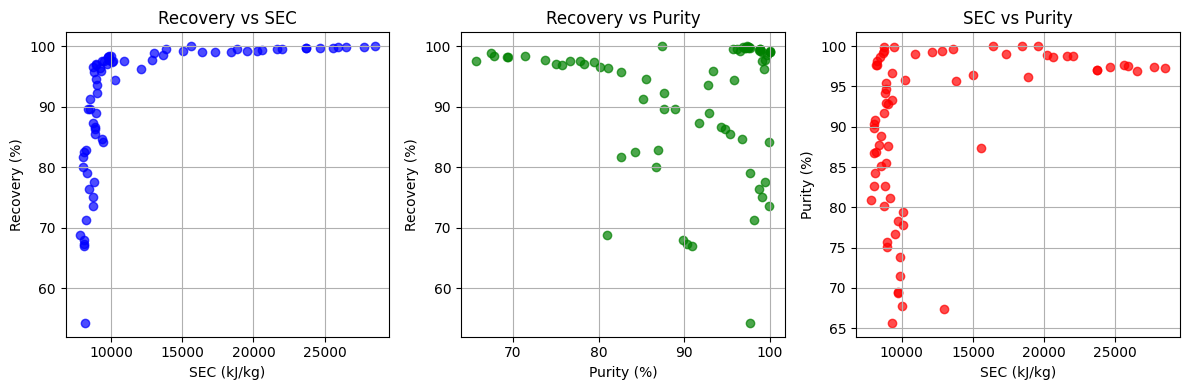

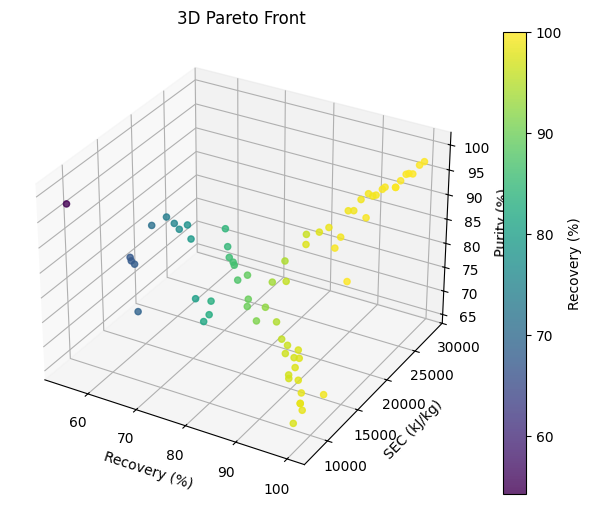

In [18]:
# ============================================
# Cell 5: Plotting 2D and 3D Pareto Front
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# Load Pareto Front from the Excel file
# -----------------------------
pareto_file = "pareto_front.xlsx"
pareto_df = pd.read_excel(pareto_file)

# Extract objectives (assuming last 3 columns are Recovery%, SEC, Purity)
recovery = pareto_df["Recovery%"].values
sec = pareto_df["SEC (kJ/kg)"].values
purity = pareto_df["CO2 Purity (mol%)"].values

# -----------------------------
# 2D Plots
# -----------------------------
plt.figure(figsize=(12, 4))

# Recovery vs SEC
plt.subplot(1, 3, 1)
plt.scatter(sec, recovery, c='blue', alpha=0.7)
plt.xlabel("SEC (kJ/kg)")
plt.ylabel("Recovery (%)")
plt.title("Recovery vs SEC")
plt.grid(True)

# Recovery vs Purity
plt.subplot(1, 3, 2)
plt.scatter(purity, recovery, c='green', alpha=0.7)
plt.xlabel("Purity (%)")
plt.ylabel("Recovery (%)")
plt.title("Recovery vs Purity")
plt.grid(True)

# SEC vs Purity
plt.subplot(1, 3, 3)
plt.scatter(sec, purity, c='red', alpha=0.7)
plt.xlabel("SEC (kJ/kg)")
plt.ylabel("Purity (%)")
plt.title("SEC vs Purity")
plt.grid(True)

plt.tight_layout()
plt.show()

# -----------------------------
# 3D Pareto Front Plot
# -----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(recovery, sec, purity, c=recovery, cmap='viridis', alpha=0.8)
ax.set_xlabel("Recovery (%)")
ax.set_ylabel("SEC (kJ/kg)")
ax.set_zlabel("Purity (%)")
ax.set_title("3D Pareto Front")
plt.colorbar(sc, label="Recovery (%)")
plt.show()

# TOPSIS

In [35]:
# ============================================
# Cell 6: TOPSIS
# ============================================

import numpy as np

# -----------------------------
# User-defined physical weights
# Based on literature:
# SEC > Recovery > Purity
# -----------------------------
# weights = np.array([0.33, 0.14, 0.53])    # Recovery, SEC, Purity
weights = np.array([0.25, 0.2, 0.55])    # Recovery, SEC, Purity
weights = weights / weights.sum()         # Normalize to sum=1

print("Using weighted TOPSIS with weights:")
print(f"  Recovery = {weights[0]:.2f}")
print(f"  SEC      = {weights[1]:.2f}")
print(f"  Purity   = {weights[2]:.2f}")

# -----------------------------
# Extract objectives from Pareto DF
# -----------------------------
objectives = np.array(
    pareto_df[["Recovery%", "SEC (kJ/kg)", "CO2 Purity (mol%)"]].values,
    dtype=float
)

# -----------------------------
# Normalize objectives
# -----------------------------
norm_obj = objectives / np.sqrt((objectives**2).sum(axis=0))

# -----------------------------
# Apply weights
# -----------------------------
norm_obj_weighted = norm_obj * weights

# -----------------------------
# Identify ideal best/worst
# -----------------------------
ideal_best = np.array([
    norm_obj_weighted[:, 0].max(),  # maximize Recovery
    norm_obj_weighted[:, 1].min(),  # minimize SEC
    norm_obj_weighted[:, 2].max()   # maximize Purity
])

ideal_worst = np.array([
    norm_obj_weighted[:, 0].min(),
    norm_obj_weighted[:, 1].max(),
    norm_obj_weighted[:, 2].min()
])

# -----------------------------
# Compute TOPSIS distances
# -----------------------------
dist_best = np.sqrt(((norm_obj_weighted - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((norm_obj_weighted - ideal_worst)**2).sum(axis=1))

topsis_score = dist_worst / (dist_best + dist_worst)

# -----------------------------
# Identify best solution
# -----------------------------
best_idx = np.argmax(topsis_score)

print("\n================ TOPSIS RESULTS (No Constraints) ================\n")
print("Best solution index:", best_idx)
print(f"Recovery = {objectives[best_idx,0]:.2f}")
print(f"SEC      = {objectives[best_idx,1]:.2f}")
print(f"Purity   = {objectives[best_idx,2]:.2f}")
print("\nWeighted TOPSIS successfully applied.")
print("=================================================================\n")

Using weighted TOPSIS with weights:
  Recovery = 0.25
  SEC      = 0.20
  Purity   = 0.55

================ TOPSIS RESULTS (No Constraints) ================

Best solution index: 21
Recovery = 97.57
SEC      = 10914.00
Purity   = 99.06

Weighted TOPSIS successfully applied.

